**Data Analysis of Myntra Fashion Store**

Myntra is a popular name among fashion enthusiasts, by fashion enthusiasts we mean quite everyone. Everyone wants to make a style statement and everyone wants to stand out. In this sort of environment, Myntra is a perfect destination for these people. It is a place that caters to a lot of demands in a single and simple setting. A single stop for all things fashion.

In [195]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myntra-fashion-dataset/Myntra Fasion Clothing.csv


**importing dataset**

In [196]:
dtype_dict = {'DiscountOffer': str}
df = pd.read_csv("/kaggle/input/myntra-fashion-dataset/Myntra Fasion Clothing.csv", dtype=dtype_dict)
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


**data preprocessing**

In [197]:
df.shape

(526564, 13)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [199]:
df.describe()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
count,5.265640e+05,333406.000000,526564.000000,190412.000000,190412.000000
mean,1.506939e+07,1237.444401,2414.068615,4.094892,61.990820
std,3.225710e+06,1052.063517,1916.962914,0.494158,125.714537
min,2.739900e+04,127.000000,99.000000,1.000000,0.000000
25%,1.388053e+07,659.000000,1299.000000,3.900000,8.000000
50%,1.597106e+07,952.000000,1999.000000,4.200000,18.000000
75%,1.734741e+07,1469.000000,2899.000000,4.400000,52.000000
max,1.846435e+07,27996.000000,90000.000000,5.000000,999.000000


**checking for missing values**

In [200]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

**filling the missing value**

In [201]:
df['DiscountPrice (in Rs)'] = df['DiscountPrice (in Rs)'].fillna(df['DiscountPrice (in Rs)'].mean())
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())
df.isnull().sum()

URL                          0
Product_id                   0
BrandName                    0
Category                     0
Individual_category          0
category_by_Gender           0
Description                  0
DiscountPrice (in Rs)        0
OriginalPrice (in Rs)        0
DiscountOffer            74306
SizeOption                   0
Ratings                      0
Reviews                      0
dtype: int64

In [202]:
df['DiscountOffer'].value_counts()

DiscountOffer
50% OFF         52737
60% OFF         38285
40% OFF         27348
20% OFF         25561
55% OFF         25154
                ...  
Rs. 809 OFF         1
Rs. 1676 OFF        1
Rs. 1663 OFF        1
Rs. 1885 OFF        1
Rs. 283 OFF         1
Name: count, Length: 1418, dtype: int64

**dropping the missing values in 'DiscountOffer' col**

In [203]:
df.drop('DiscountOffer',axis = 1,inplace = True)
df.isnull().sum()

URL                      0
Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
SizeOption               0
Ratings                  0
Reviews                  0
dtype: int64

**EDA**

**categorical and numerical features in the dataset**

In [204]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column dtype is object (indicating categorical data)
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Print the lists of categorical and numerical column names
print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['URL', 'BrandName', 'Category', 'Individual_category', 'category_by_Gender', 'Description', 'SizeOption']

Numerical Columns:
['Product_id', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews']


In [205]:
categorical_cols

['URL',
 'BrandName',
 'Category',
 'Individual_category',
 'category_by_Gender',
 'Description',
 'SizeOption']

In [206]:
numerical_cols

['Product_id',
 'DiscountPrice (in Rs)',
 'OriginalPrice (in Rs)',
 'Ratings',
 'Reviews']

In [207]:
df['BrandName'].value_counts()

BrandName
Pothys                   16005
Roadster                 10935
KALINI                    9589
HERE&NOW                  6515
HRX by Hrithik Roshan     5297
                         ...  
PIVOTO                       1
PEONY SMART WORLD            1
OFFIRA TEX WORLD             1
Sztori Garfield              1
Geonaute By Decathlon        1
Name: count, Length: 2088, dtype: int64

In [208]:
df['Category'].value_counts()

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

In [209]:
df['Individual_category'].value_counts()

Individual_category
tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: count, Length: 92, dtype: int64

In [210]:
df['Ratings'].value_counts()

Ratings
4.094892    336152
4.300000     22529
4.200000     20573
4.400000     18339
4.100000     17278
4.000000     17203
4.500000     13295
3.900000     11358
3.800000     11034
4.600000      9668
3.700000      7042
4.700000      5823
3.600000      5546
4.800000      4938
3.500000      4135
3.400000      3382
5.000000      3235
3.300000      2983
3.000000      2523
3.200000      1810
4.900000      1570
3.100000      1053
2.800000       940
2.900000       569
2.700000       557
2.500000       533
2.600000       467
2.000000       441
2.300000       405
1.000000       341
2.400000       259
2.200000       154
1.500000       101
1.800000        92
1.700000        65
2.100000        54
1.600000        39
1.300000        35
1.900000        23
1.400000        11
1.200000         7
1.100000         2
Name: count, dtype: int64

In [211]:
df['Reviews'].value_counts()

Reviews
61.99082     336152
5.00000       12173
6.00000        9876
7.00000        8326
8.00000        7346
              ...  
960.00000         1
992.00000         1
994.00000         1
821.00000         1
997.00000         1
Name: count, Length: 1001, dtype: int64

In [212]:
df['SizeOption'].value_counts()

SizeOption
S, M, L, XL, XXL          84643
Onesize                   77031
S, M, L, XL               53543
XS, S, M, L, XL           43875
XS, S, M, L, XL, XXL      37899
                          ...  
39, 40, 44, 46, 50            1
L, XL, XXL, M                 1
M, L, XL, 3XL, 4XL            1
32, 34, 40                    1
26, 27, 28, 29, 30, 32        1
Name: count, Length: 3588, dtype: int64

In [213]:
df.head(25)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.000000,1499.0,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.000000,1149.0,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.000000,1399.0,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.000000,1295.0,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,1237.444401,599.0,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,1237.444401,599.0,"XS, S, M, L, XL",4.4,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.000000,1499.0,"30, 32, 34, 36",3.9,998.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,1237.444401,1395.0,"S, M, L, XL",3.7,998.0
8,https://www.myntra.com/tshirts/roadster/roadst...,17381394,Roadster,Western,tshirts,Women,roadster women pack of 2 solid t shirts,1237.444401,1098.0,"XS, S, M, L, XL",4.3,997.0
9,https://www.myntra.com/jeans/herenow/herenow-m...,2359257,HERE&NOW,Bottom Wear,jeans,Men,herenow men blue slim fit mid rise clean look ...,1237.444401,2749.0,"28, 30, 32, 34, 36",3.5,996.0


**total number of products based on gender**

<Axes: xlabel='category_by_Gender'>

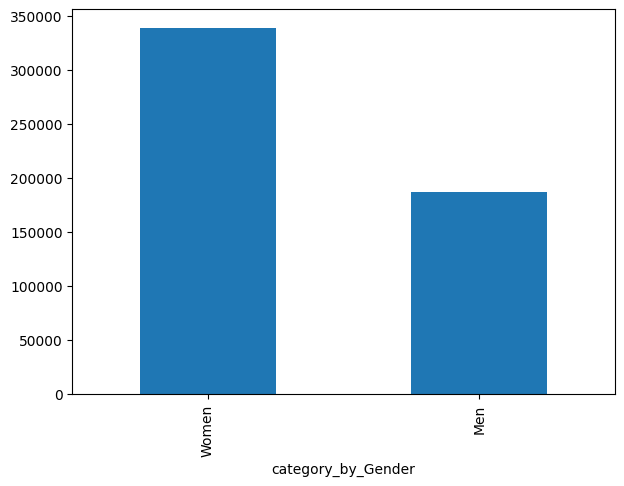

In [214]:
df['category_by_Gender'].value_counts().plot(kind='bar', stacked=True, figsize=(7,5))

**top brands**

**a) top 10 brands based on customers reviews**

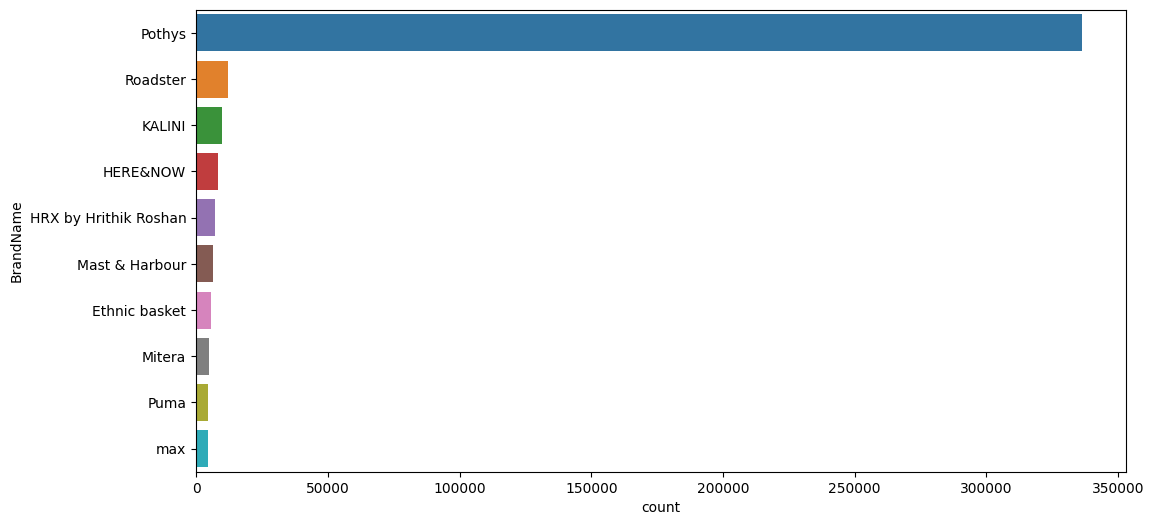

In [215]:
fig, axs = plt.subplots(1, figsize=(12, 6))
sns.barplot(x = df['Reviews'].value_counts().head(10).values, 
            y=df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**b) top 10 brands based on customers ratings**

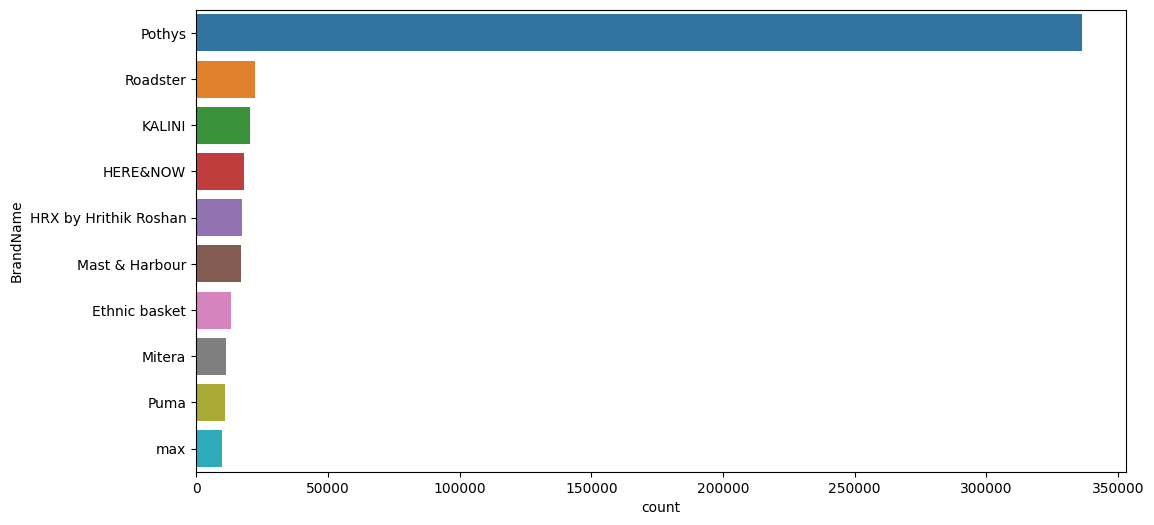

In [216]:
fig, axs = plt.subplots(1, figsize=(12, 6))
sns.barplot(x = df['Ratings'].value_counts().head(10).values, 
            y=df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**c) top 10 brands based on OriginalPrice(in Rs)**

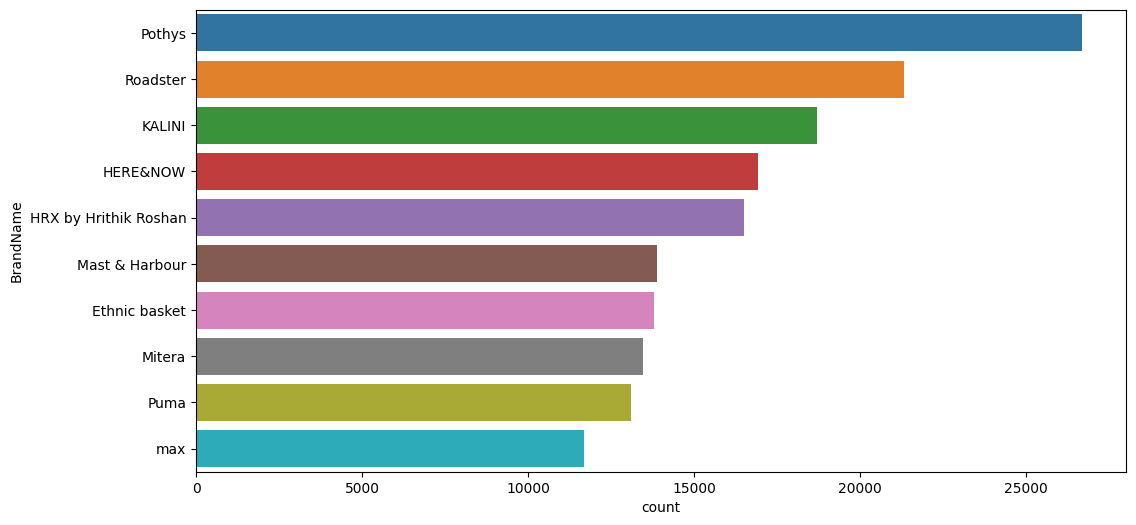

In [217]:
fig, axs = plt.subplots(1, figsize=(12, 6))
sns.barplot(x = df['OriginalPrice (in Rs)'].value_counts().head(10).values, 
            y=df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**d) top 10 brands based on DiscountPrice(in Rs)**

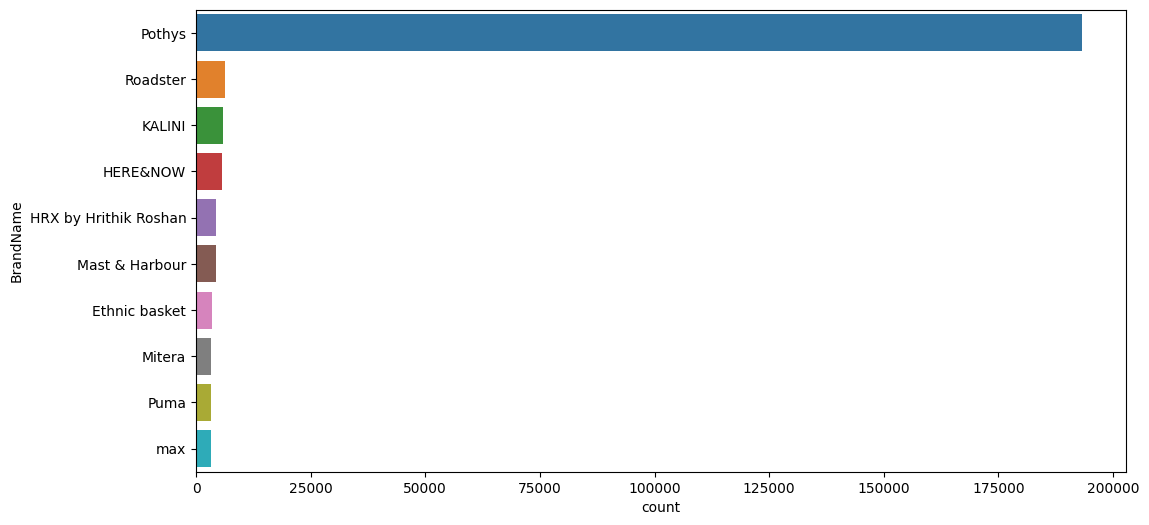

In [218]:
fig, axs = plt.subplots(1, figsize=(12, 6))
sns.barplot(x = df['DiscountPrice (in Rs)'].value_counts().head(10).values, 
            y=df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**e) top 10 brands based on SizeOption**

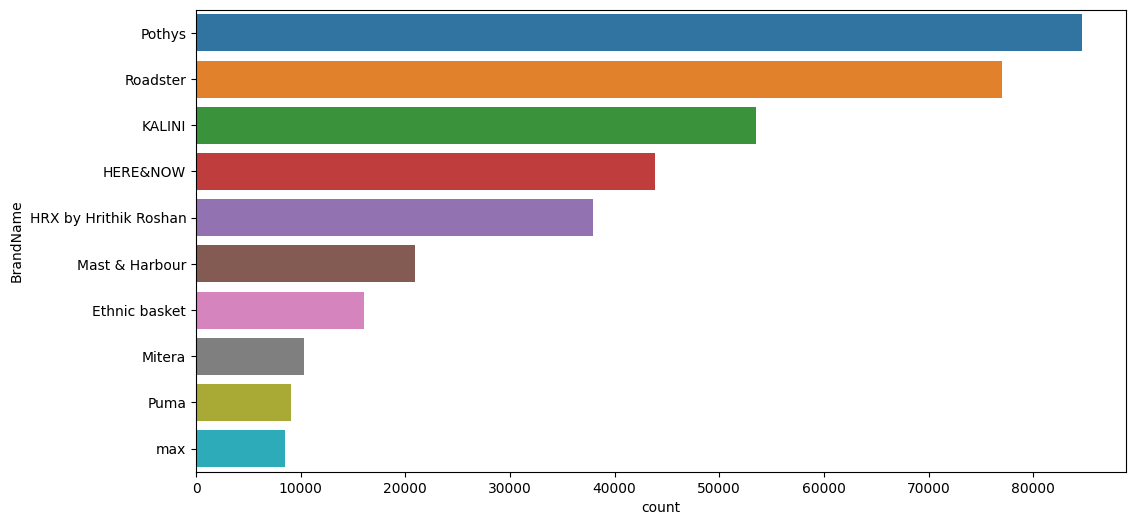

In [219]:
fig, axs = plt.subplots(1, figsize=(12, 6))
sns.barplot(x = df['SizeOption'].value_counts().head(10).values, 
            y=df['BrandName'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**f) top 10 brands based on Gender**

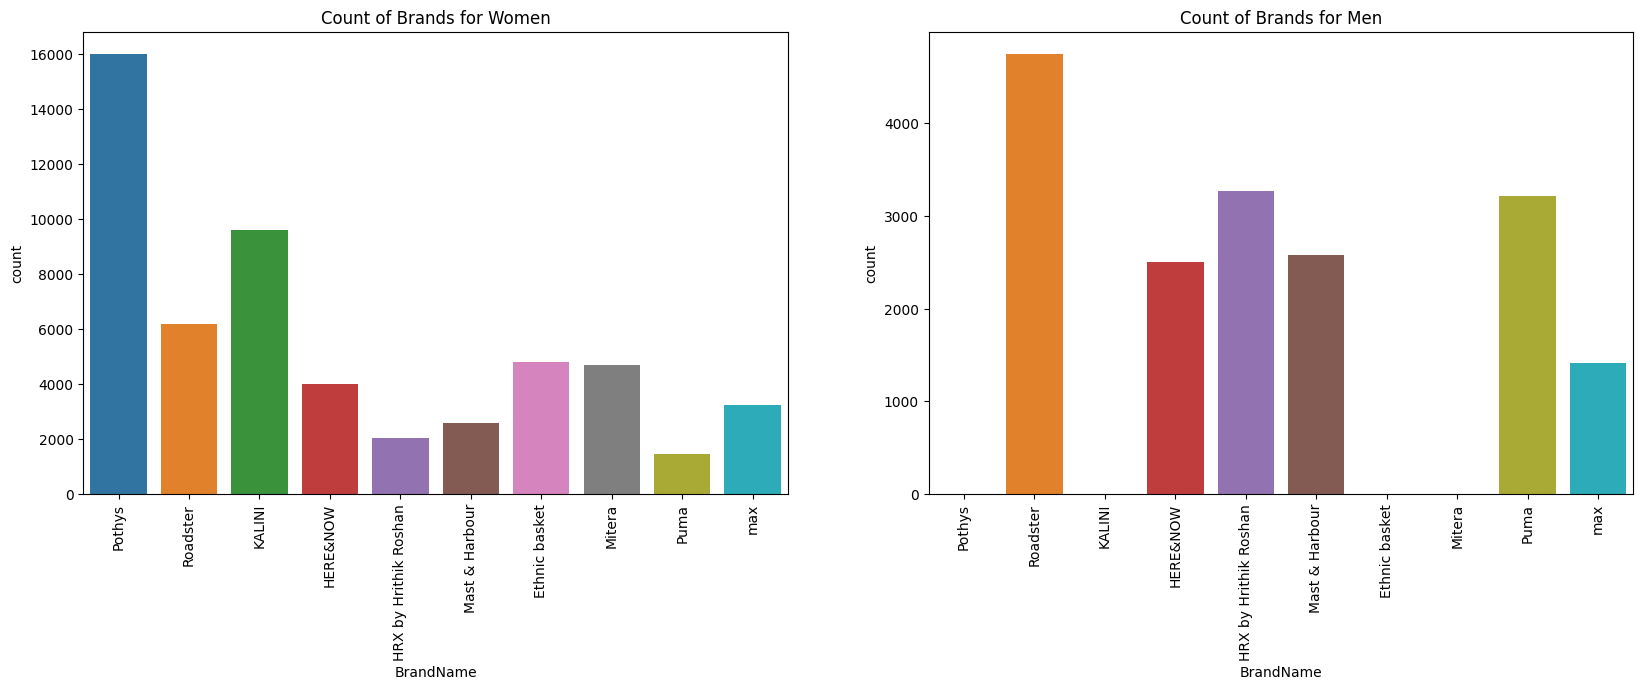

In [220]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))

# Plot count of brands for women
sns.countplot(data=df[df['category_by_Gender'] == 'Women'], x='BrandName', ax=axs[0], order=df['BrandName'].value_counts().index[:10])
axs[0].set_title("Count of Brands for Women")
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot count of brands for men
sns.countplot(data=df[df['category_by_Gender'] == 'Men'], x='BrandName', ax=axs[1], order=df['BrandName'].value_counts().index[:10])
axs[1].set_title("Count of Brands for Men")
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Show plots
plt.show()

**Observations from above plots**
1. Based on Customer Ratings,Reviews and DiscountPrice(in Rs), Pothys is the top brand.
2. As per OriginalPrice(in Rs),Pothys leads as usual but Roadster, Kalini , Here&Now and HRX by Hrithik Roshan are also the top brands. 
3. While  maximum number of Size Options  are available in Pothys and Roadster brands.
4. For Women section, Top brand is Pothys and for men section, Roadster leads.


**top Categories**


In [221]:
df['Category'].value_counts()

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

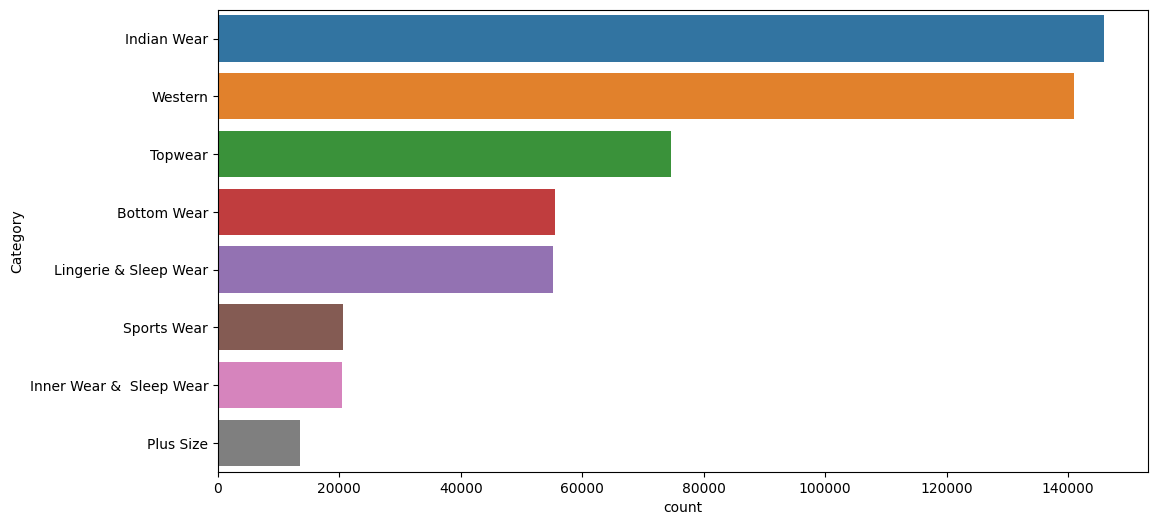

In [222]:
fig, axs = plt.subplots( figsize=(12, 6))
sns.barplot(x = df['Category'].value_counts().head(10).values, 
            y = df['Category'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**Indian Wear and Western are the two categories with maximum products**

**Top 10 brands in Indian Wear Section**

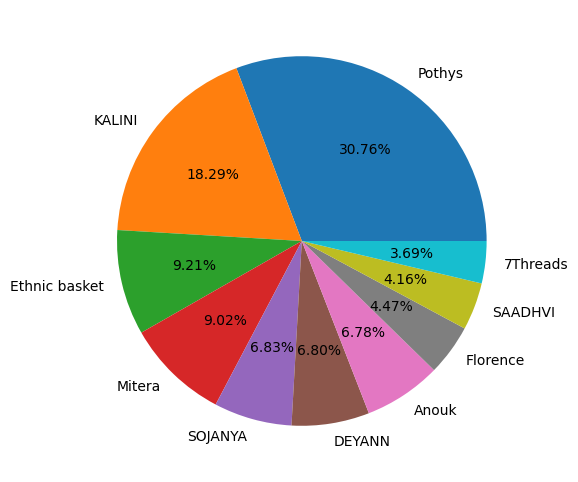

In [223]:
IndianWear = df[df['Category'] == 'Indian Wear']
sizes = IndianWear['BrandName'].value_counts().head(10).values
labels = IndianWear['BrandName'].value_counts().head(10).index

fig, axs = plt.subplots( figsize=(12, 6))

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

**Top 10 brands in Western Wear Section**

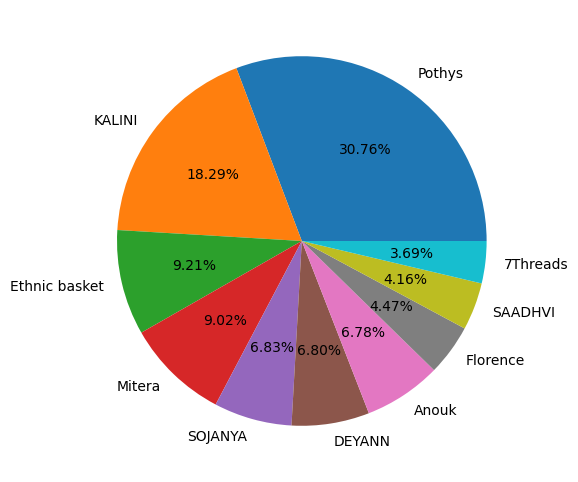

In [224]:
WesternWear = df[df['Category'] == 'Indian Wear']
sizes = WesternWear['BrandName'].value_counts().head(10).values
labels = WesternWear['BrandName'].value_counts().head(10).index

fig, axs = plt.subplots( figsize=(12, 6))

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

**top 10 Indiviual Categories**

In [225]:
df['Individual_category'].value_counts()

Individual_category
tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: count, Length: 92, dtype: int64

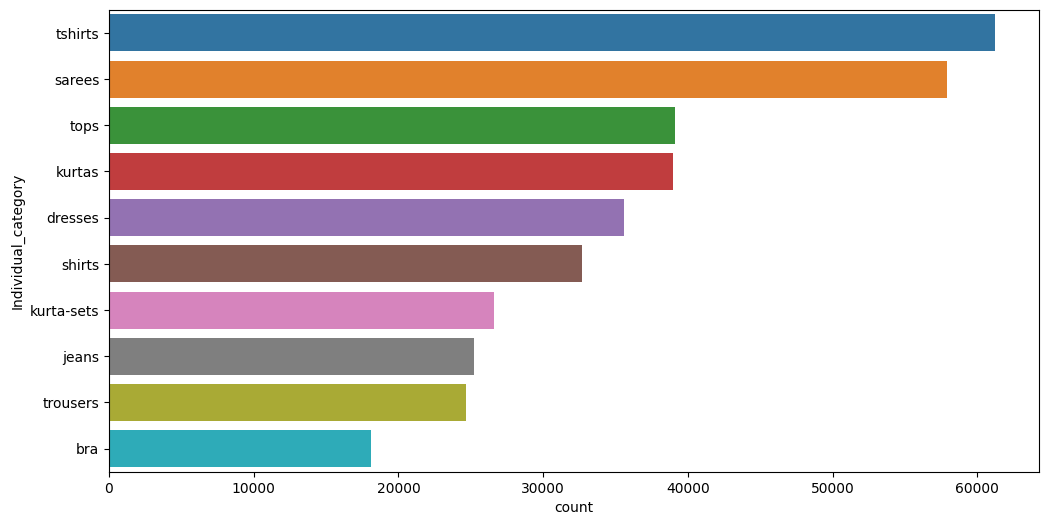

In [226]:
fig, axs = plt.subplots( figsize=(12, 6))
sns.barplot(x = df['Individual_category'].value_counts().head(10).values, 
            y = df['Individual_category'].value_counts().head(10).index)
plt.xlabel('count')
plt.show()

**Tshirts and Sarees are the two Individual categories with maximum products**

**Top 10 tshirts brand**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


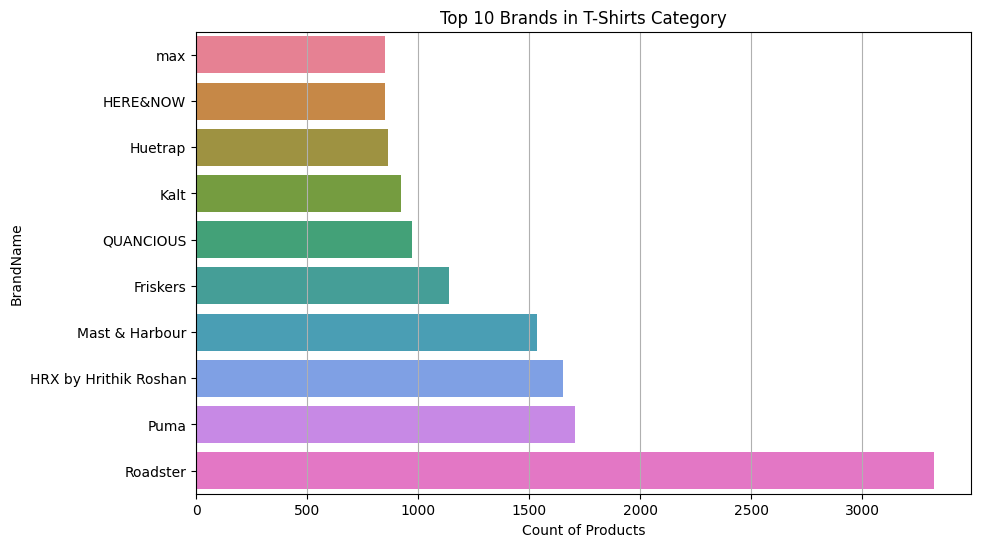

In [227]:
TSHIRT = df[df['Individual_category'] == 'tshirts']
brand_counts = TSHIRT['BrandName'].value_counts().head(10)
top_brands = brand_counts.index.tolist()[::-1]
brand_counts_sorted = brand_counts.sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette with different colors for each category
colors = sns.color_palette("husl", len(brand_counts_sorted))

sns.barplot(x=brand_counts_sorted, y=top_brands, palette=colors, ax=ax)
ax.set_xlabel('Count of Products')
ax.set_ylabel('BrandName')
ax.set_title('Top 10 Brands in T-Shirts Category')
plt.grid(axis='x')

plt.show()

**top 10 sarees brand**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


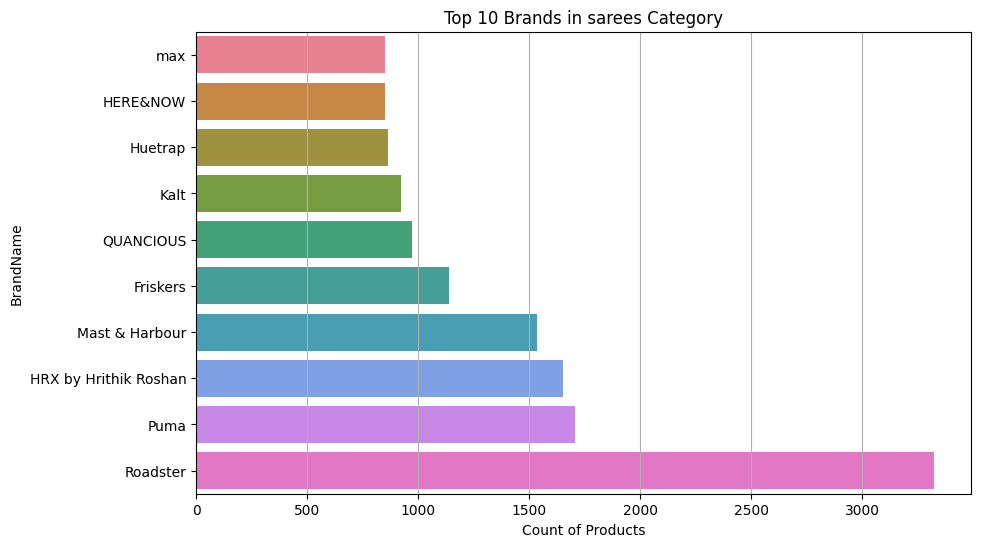

In [228]:
SAREES = df[df['Individual_category'] == 'sarees']
brand_counts = TSHIRT['BrandName'].value_counts().head(10)
top_brands = brand_counts.index.tolist()[::-1]
brand_counts_sorted = brand_counts.sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette with different colors for each category
colors = sns.color_palette("husl", len(brand_counts_sorted))

sns.barplot(x=brand_counts_sorted, y=top_brands, palette=colors, ax=ax)
ax.set_xlabel('Count of Products')
ax.set_ylabel('BrandName')
ax.set_title('Top 10 Brands in sarees Category')
plt.grid(axis='x')

plt.show()

**Most selling category in women**

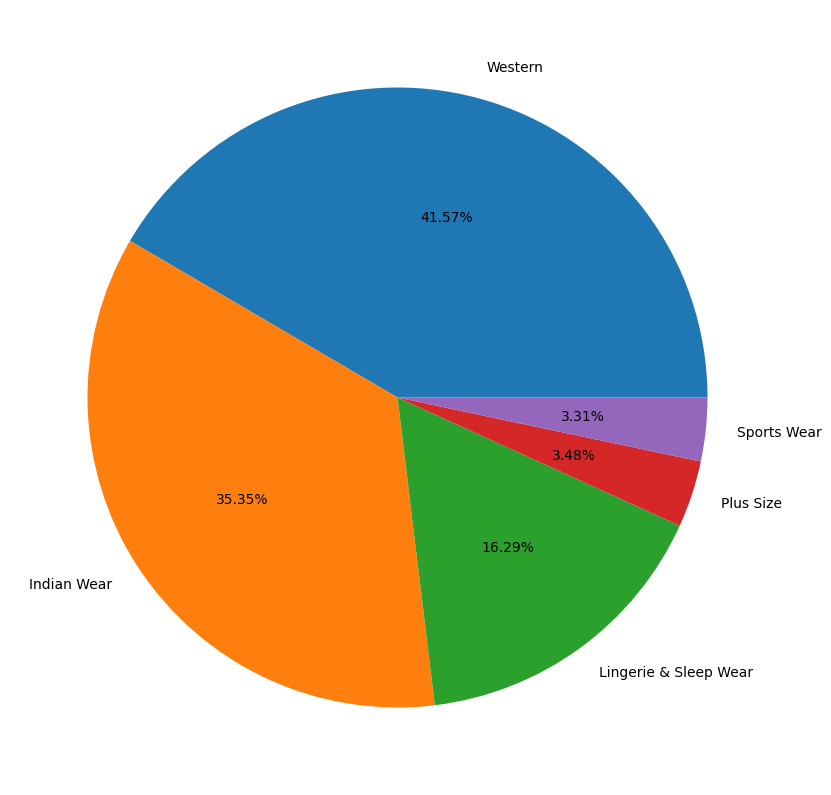

In [233]:
WOMEN = df[df['category_by_Gender'] == 'Women']
S = WOMEN['Category'].value_counts().values
V = WOMEN['Category'].value_counts().index

fig, axs = plt.subplots( figsize=(10, 15))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

**Most selling Individual category in women**

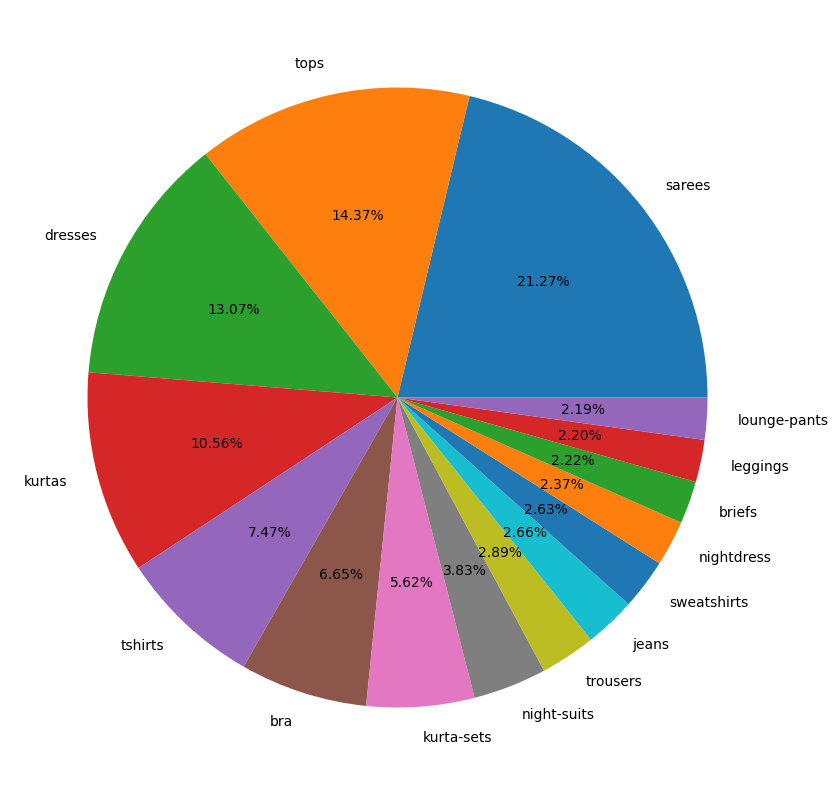

In [234]:
WOMEN = df[df['category_by_Gender'] == 'Women']
S = WOMEN['Individual_category'].value_counts().values
V = WOMEN['Individual_category'].value_counts().index

fig, axs = plt.subplots( figsize=(10, 15))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

**Most selling category in Men**

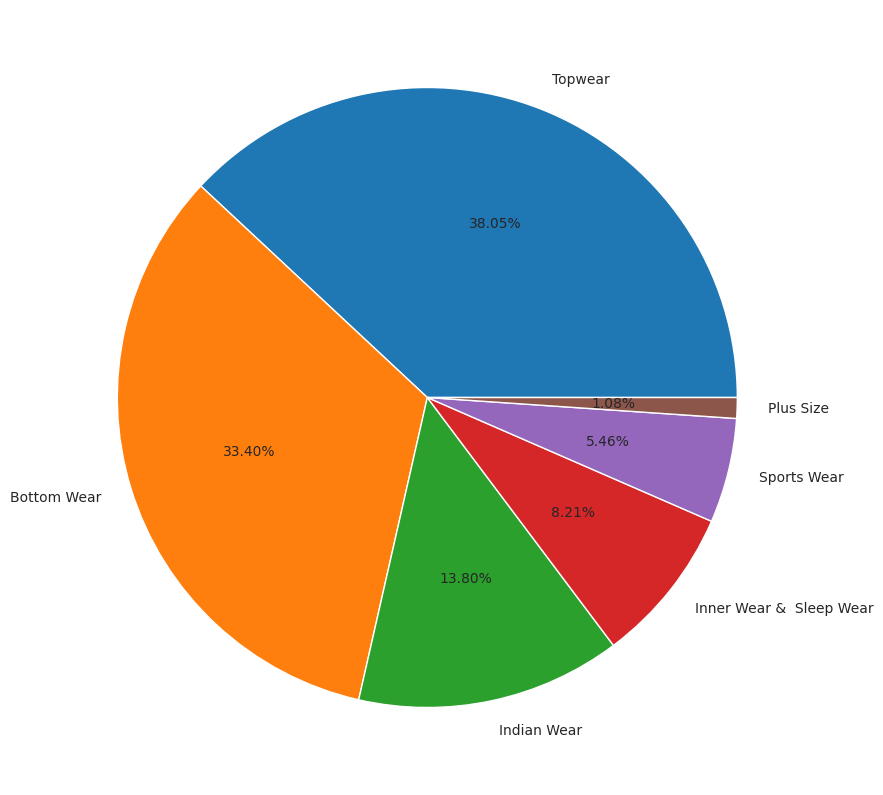

In [242]:
MEN = df[df['category_by_Gender'] == 'Men']
Si = MEN['Category'].value_counts().values
Vi = MEN['Category'].value_counts().index

fig, axs = plt.subplots( figsize=(10, 15))
plt.pie(Si[:15],labels=Vi[:15],autopct='%1.2f%%')
plt.show()

****Most selling Individual category in Men****

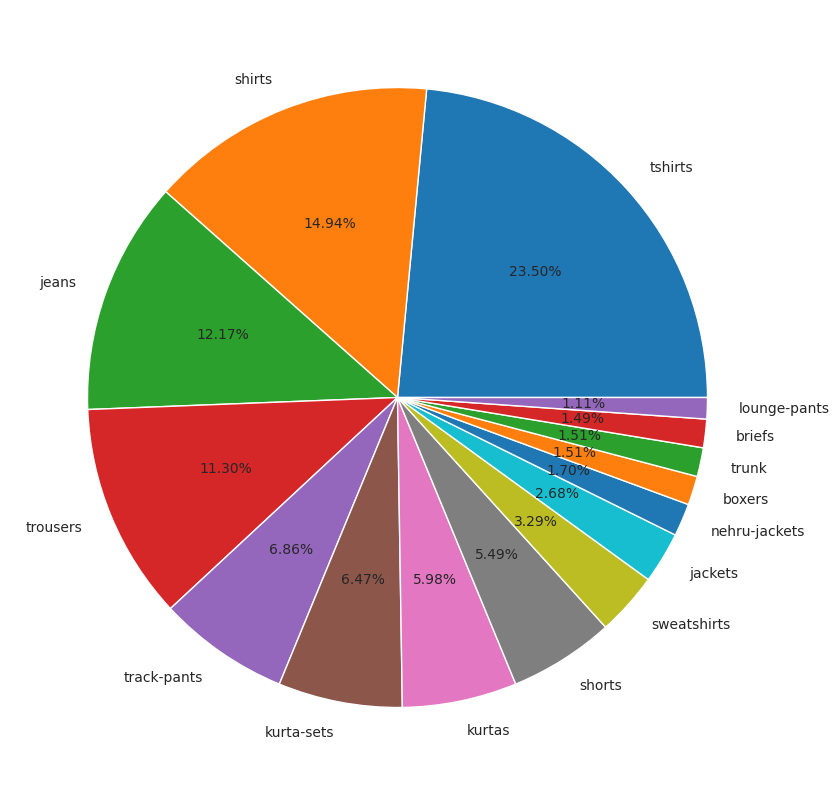

In [244]:
MEN = df[df['category_by_Gender'] == 'Men']
Si = MEN['Individual_category'].value_counts().values
Vi = MEN['Individual_category'].value_counts().index

fig, axs = plt.subplots( figsize=(10, 15))
plt.pie(Si[:15],labels=Vi[:15],autopct='%1.2f%%')
plt.show()

**popular size options among men and women**

In [238]:
df['SizeOption'].value_counts()

SizeOption
S, M, L, XL, XXL          84643
Onesize                   77031
S, M, L, XL               53543
XS, S, M, L, XL           43875
XS, S, M, L, XL, XXL      37899
                          ...  
39, 40, 44, 46, 50            1
L, XL, XXL, M                 1
M, L, XL, 3XL, 4XL            1
32, 34, 40                    1
26, 27, 28, 29, 30, 32        1
Name: count, Length: 3588, dtype: int64

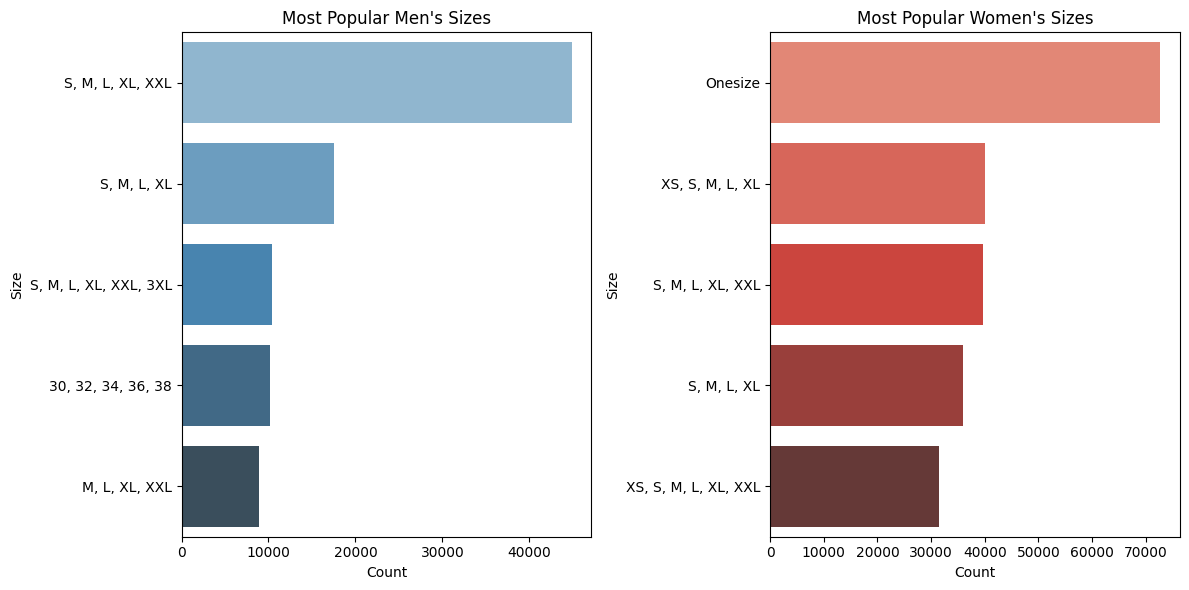

In [239]:
# Filter the DataFrame for men and women separately
men_sizes = df[df['category_by_Gender'] == 'Men']['SizeOption']
women_sizes = df[df['category_by_Gender'] == 'Women']['SizeOption']

# Count the occurrences of each size option for men and women
most_popular_men_sizes = men_sizes.value_counts().head(5)
most_popular_women_sizes = women_sizes.value_counts().head(5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot most popular men's sizes
sns.barplot(x=most_popular_men_sizes.values, y=most_popular_men_sizes.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Most Popular Men's Sizes")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Size")

# Plot most popular women's sizes
sns.barplot(x=most_popular_women_sizes.values, y=most_popular_women_sizes.index, ax=axs[1], palette="Reds_d")
axs[1].set_title("Most Popular Women's Sizes")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("Size")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

**most popular size option across all categories?**

In [240]:
df['Sizes'] = df['SizeOption'].str.split(', ')
df = df.explode('Sizes')
size_count = df.groupby(['Sizes'])['Sizes'].count().sort_values(ascending=False).head(15)

print(size_count)

Sizes
M          307714
L          307407
XL         297405
S          283238
XXL        199846
XS         105239
Onesize     77041
32          66410
30          65740
34          65086
36          60040
3XL         60004
38          58239
28          47292
40          44106
Name: Sizes, dtype: int64


**Gender preference for different categories**

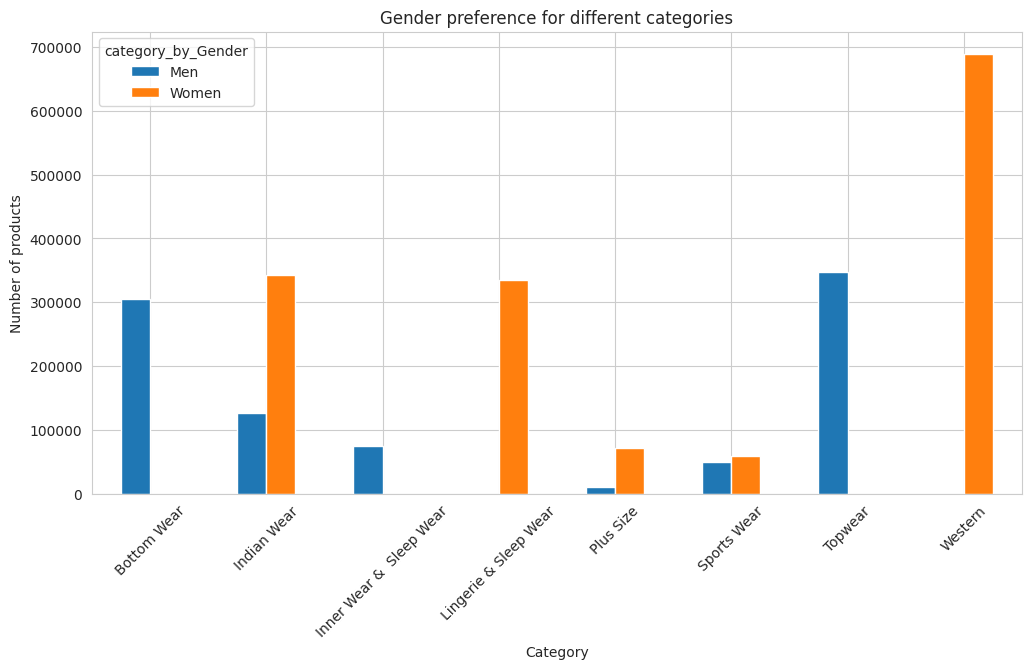

In [249]:
# Group by category and gender, and count the number of products in each group
gender_count = df.groupby(['Category', 'category_by_Gender'])['Product_id'].count().reset_index()
gender_count = gender_count.rename(columns={'Product_id': 'Count'})

# Pivot the data to get separate columns for male and female counts
gender_count = gender_count.pivot(index='Category', columns='category_by_Gender', values='Count')

fig, ax = plt.subplots(figsize=(12, 6))
gender_count.plot(kind='bar', ax=ax)
ax.set_title('Gender preference for different categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of products')
plt.xticks(rotation=45)
plt.show()


****top 3 distribution in Categories****

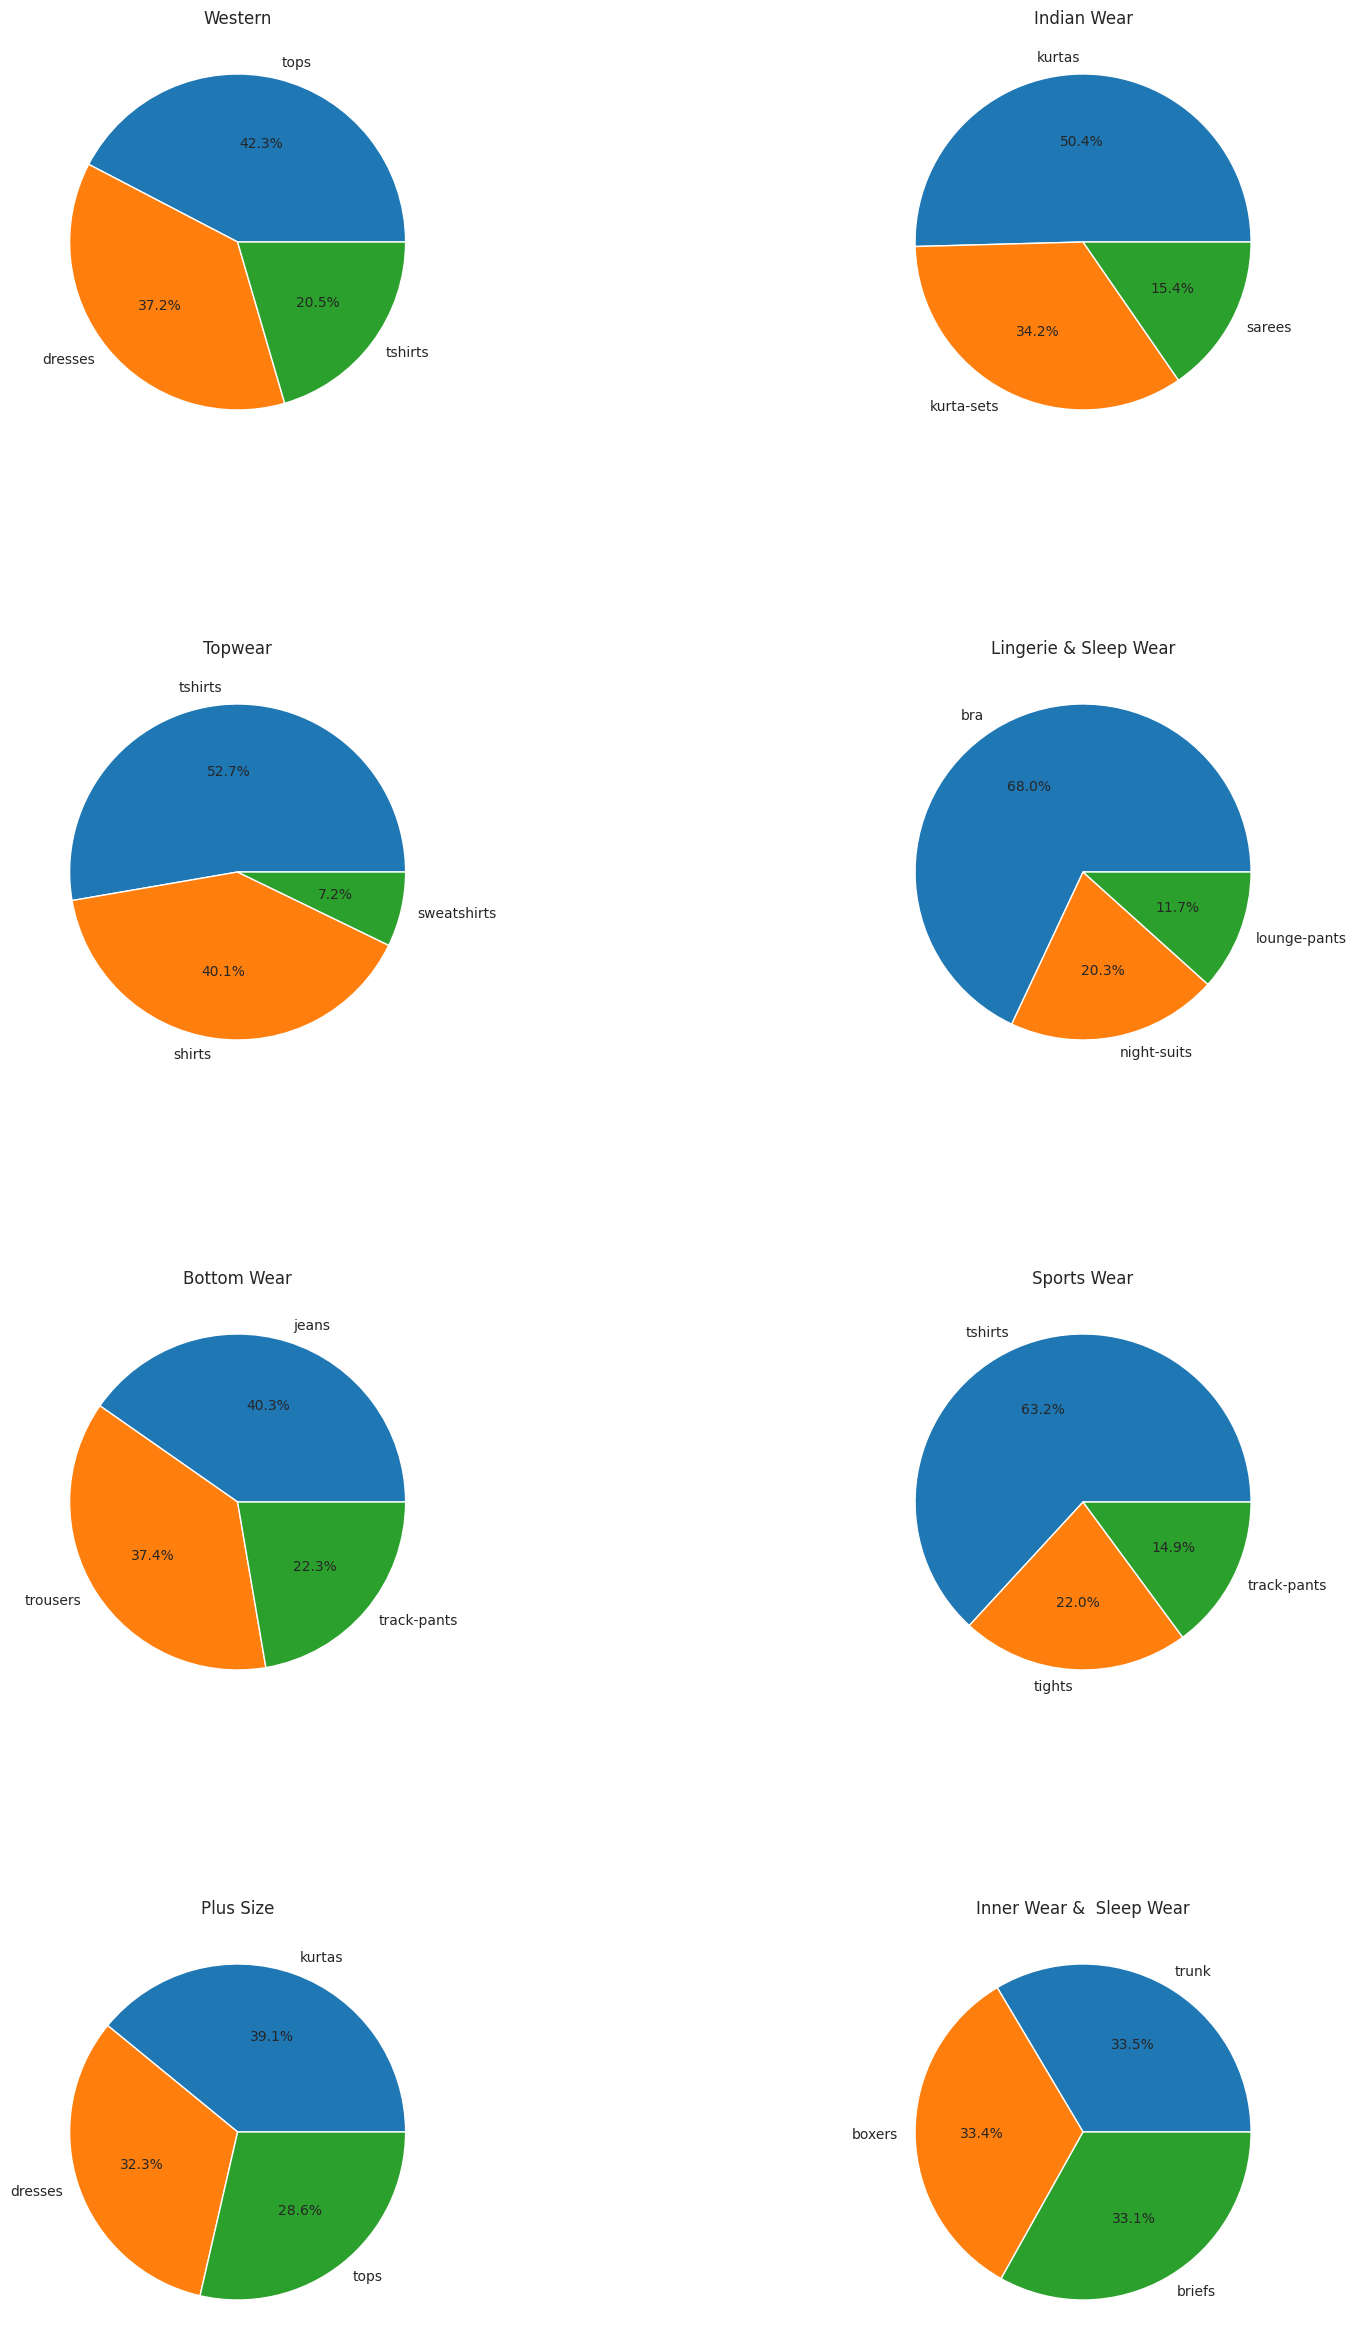

In [251]:
# create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))

top_categories = df['Category'].value_counts().head(8)

# iterate through top categories and plot pie charts
for i, category in enumerate(top_categories.index):
    top_subcategories = df[df['Category'] == category]['Individual_category'].value_counts().head(3)
    ax = axes[i//2, i%2]
    ax.set_title(category)
    ax.pie(top_subcategories, labels=top_subcategories.index, autopct='%1.1f%%')
    
plt.subplots_adjust(hspace=0.5)
plt.show()

**brand with the highest number of products in each category**

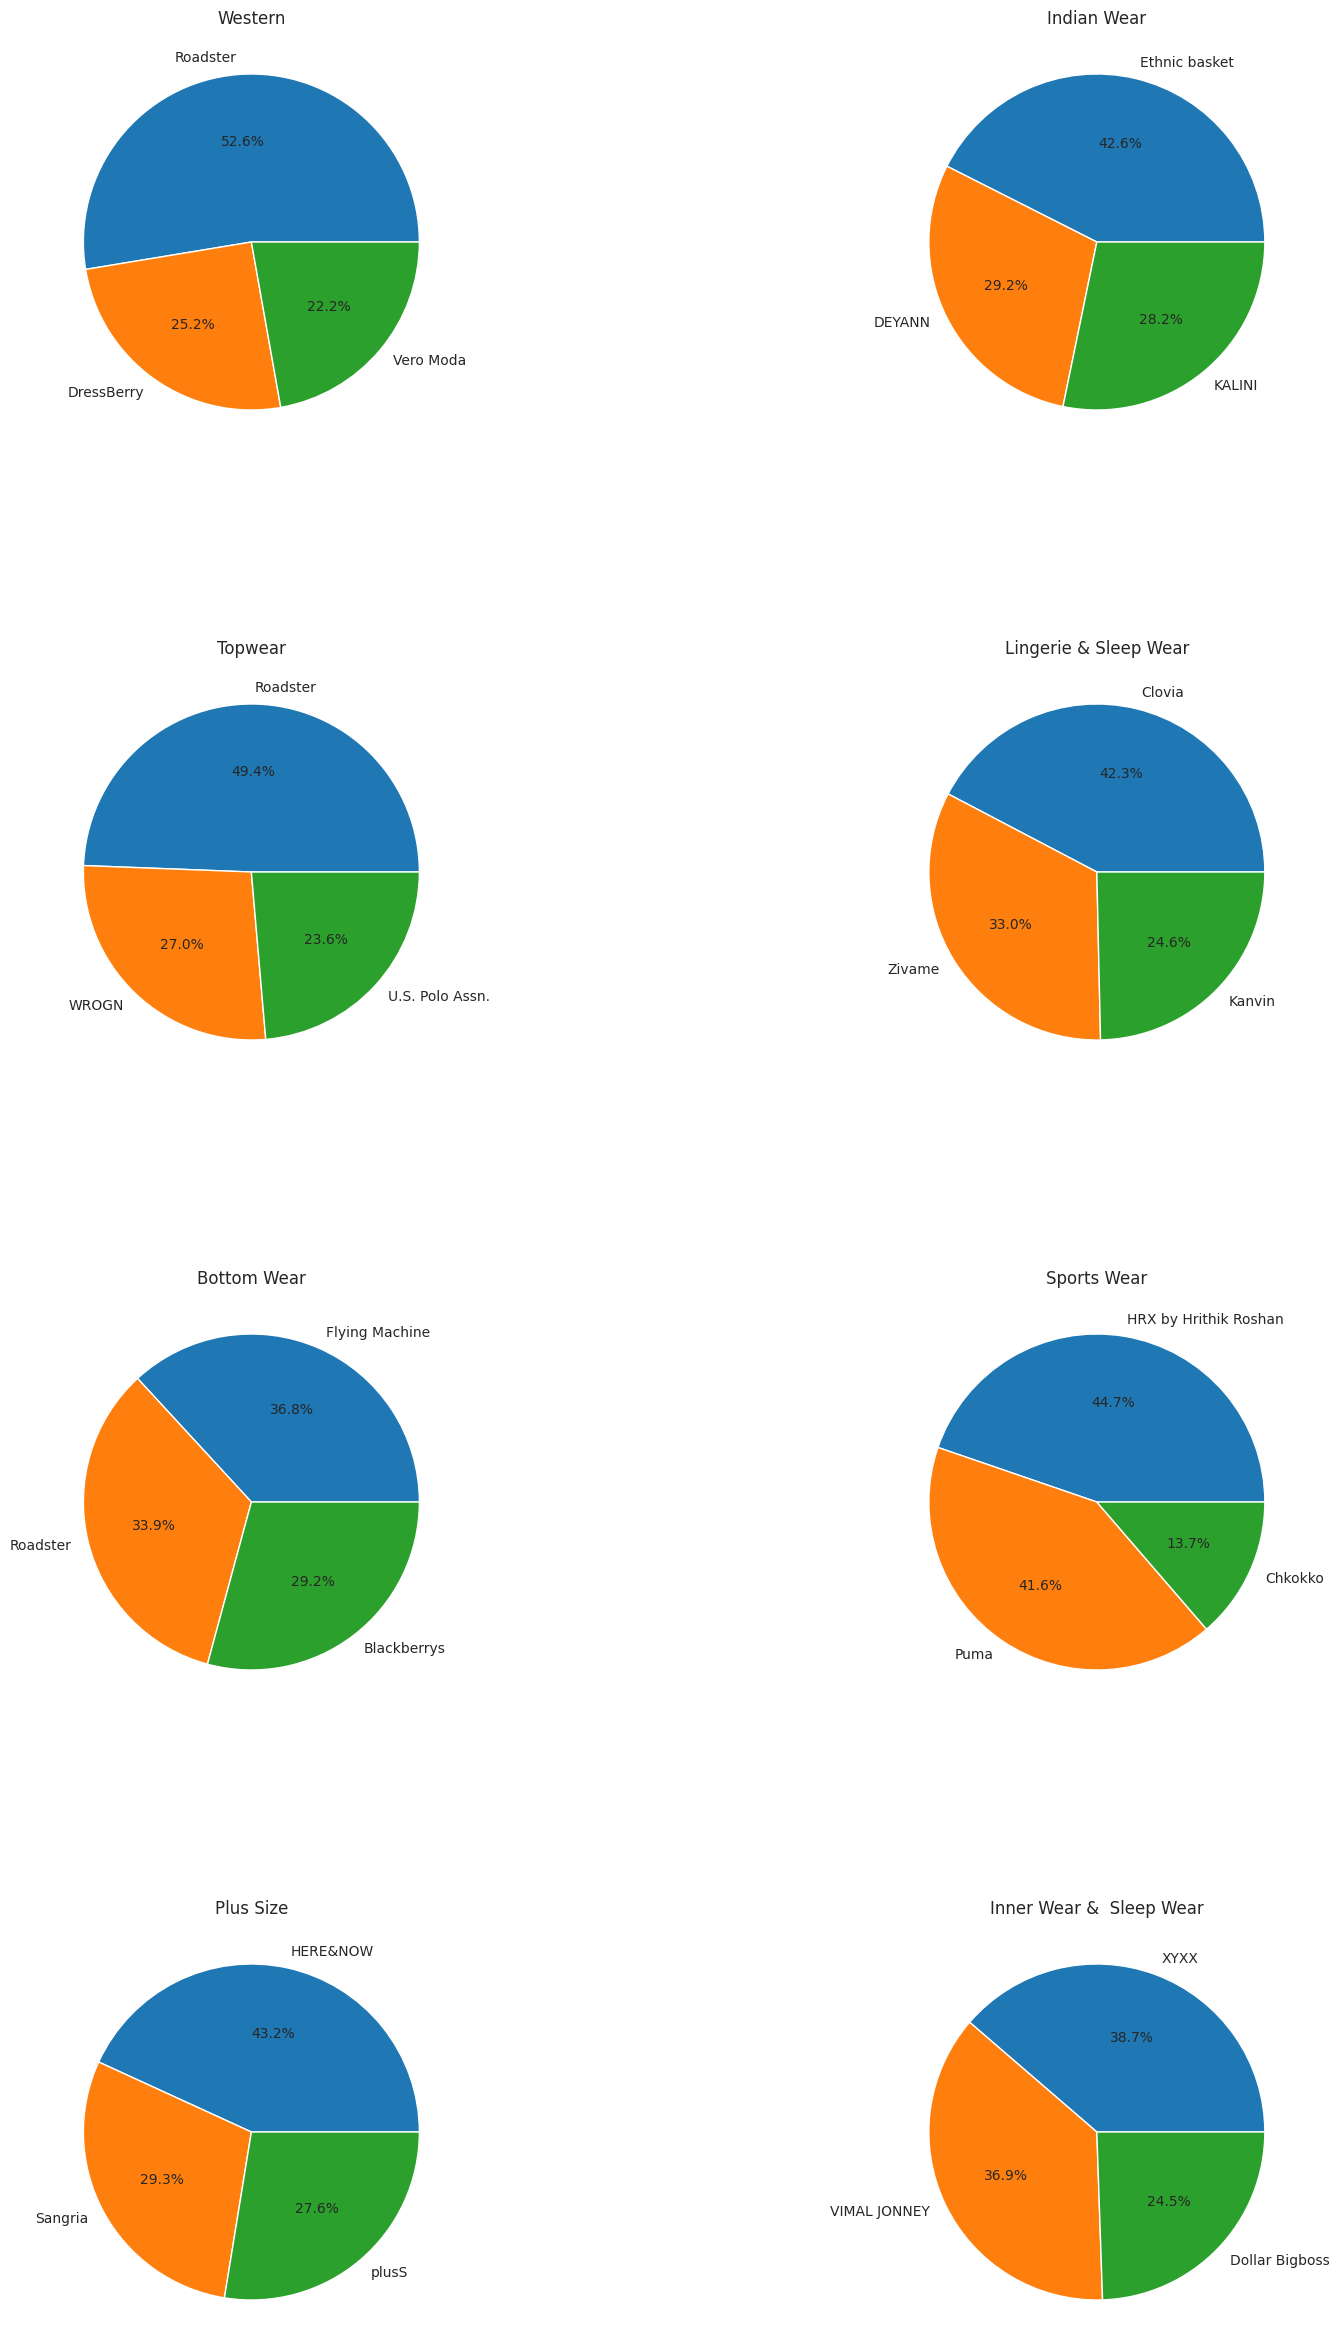

In [252]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))

# iterate through top categories and plot pie charts
for i, category in enumerate(top_categories.index):
    top_brands = df[df['Category'] == category]['BrandName'].value_counts().head(3)
    ax = axes[i//2, i%2]
    ax.set_title(category)
    ax.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%')
    
plt.subplots_adjust(hspace=0.5)
plt.show()

**Number of Products in Each Individual Category**

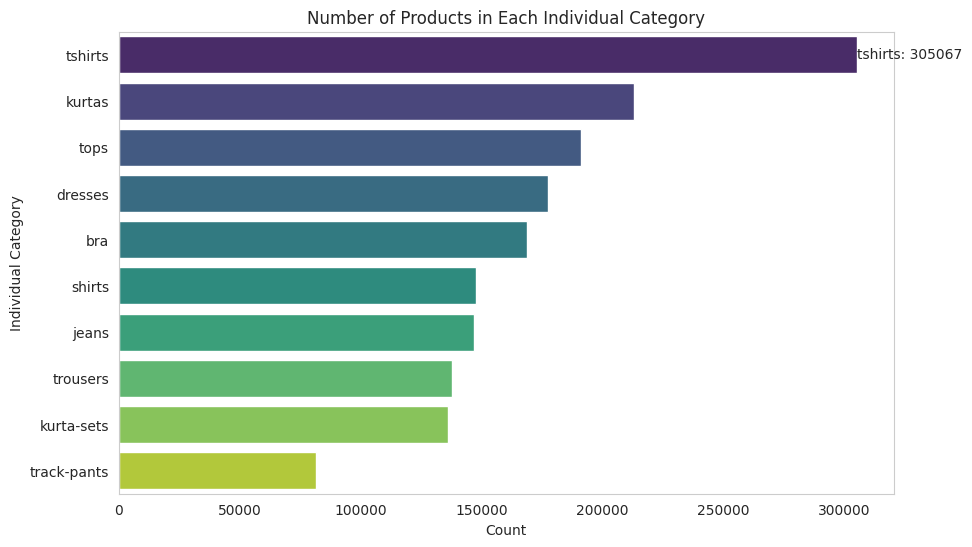

In [255]:
# Group the data by individual category and count the number of products in each category
Individual_category_counts = df['Individual_category'].value_counts().head(10)

# Find the individual category with the highest count
highest_category = Individual_category_counts.idxmax()
highest_count = Individual_category_counts.max()

# Plot the count of products for each individual category
plt.figure(figsize=(10, 6))
sns.barplot(x=Individual_category_counts.values, y=Individual_category_counts.index, palette='viridis')
plt.title('Number of Products in Each Individual Category')
plt.xlabel('Count')
plt.ylabel('Individual Category')
plt.grid(axis='x')

# Annotate the highest category
plt.text(x=highest_count + 5, y=Individual_category_counts.index.get_loc(highest_category),
         s=f'{highest_category}: {highest_count}', va='center')

# Show plot
plt.show()


**Minimum and Maximum Original Price for Top 5 Individual Categories**

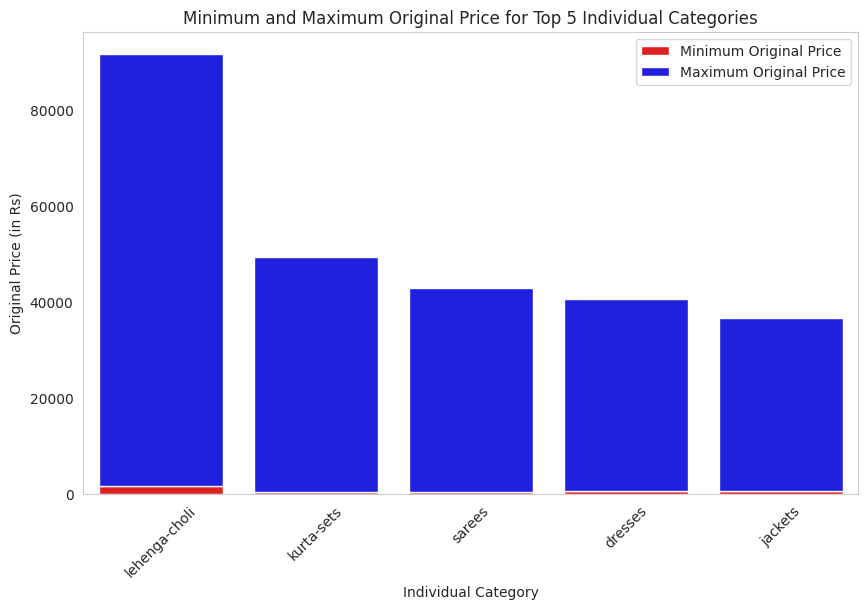

In [271]:
# Group the data by individual category and calculate the min and max original price
Individual_category_price_stats = df.groupby('Individual_category')['OriginalPrice (in Rs)'].agg(['min', 'max'])

# Calculate the total original price for each individual category
Individual_category_price_stats['total_price'] = Individual_category_price_stats['max'] - Individual_category_price_stats['min']

# Sort the individual categories based on their total original price
sorted_categories = Individual_category_price_stats['total_price'].sort_values(ascending=False)

# Select the top 5 individual categories
top_Individual_categories = sorted_categories.head()

# Plot the minimum and maximum original price for each of the top 5 individual categories
plt.figure(figsize=(10, 6))

# Plot minimum original price
sns.barplot(x=top_Individual_categories.index, 
            y='min', data=Individual_category_price_stats.loc[top_Individual_categories.index], color='red', label='Minimum Original Price')

# Plot maximum original price
sns.barplot(x=top_Individual_categories.index, 
            y='max', data=Individual_category_price_stats.loc[top_Individual_categories.index], color='blue', label='Maximum Original Price',
            bottom=Individual_category_price_stats.loc[top_Individual_categories.index]['min'])

plt.title('Minimum and Maximum Original Price for Top 5 Individual Categories')
plt.xlabel('Individual Category')
plt.ylabel('Original Price (in Rs)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Show plot
#plt.tight_layout()
plt.show()


In [272]:
# Group the dataset by 'Category' and 'Individual_category' and calculate the maximum and minimum values of 'DiscountPrice (in Rs)'
price_range = df.groupby(['Category', 'Individual_category'])['OriginalPrice (in Rs)'].agg(['min', 'max'])

# Reset the index of the resulting dataframe
price_range = price_range.reset_index()

# Print the resulting dataframe
print(price_range)

        Category Individual_category     min      max
0    Bottom Wear               jeans   600.0  14999.0
1    Bottom Wear              shorts   399.0   9999.0
2    Bottom Wear         track-pants   375.0  16999.0
3    Bottom Wear            trousers   550.0  19999.0
4    Indian Wear             blazers  2799.0  10999.0
..           ...                 ...     ...      ...
205      Western         track-pants   330.0   9999.0
206      Western          tracksuits  1490.0  12000.0
207      Western            trousers   499.0  16990.0
208      Western             tshirts   199.0   9500.0
209      Western           waistcoat  1599.0   5590.0

[210 rows x 4 columns]
